In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [284]:
# Url to retrieve data
covid_url = (
    "https://www.data.gouv.fr/fr/datasets/r/0b66ca39-1623-4d9c-83ad-5434b7f9e2a4"
)

In [285]:
# Get Data
df = pd.read_csv(covid_url, sep=",", usecols=['date','granularite', 'maille_nom', 'cas_confirmes', 'deces', 'source_type'], parse_dates=['date'])


In [286]:
# Display First rows
df.head()

,date,granularite,maille_nom,cas_confirmes,deces,source_type
0,2020-01-24,departement,Charente,0.0,NaN,agences-regionales-sante
1,2020-01-24,departement,Charente-Maritime,0.0,NaN,agences-regionales-sante
2,2020-01-24,departement,Corrèze,0.0,NaN,agences-regionales-sante
3,2020-01-24,departement,Creuse,0.0,NaN,agences-regionales-sante
4,2020-01-24,departement,Dordogne,0.0,NaN,agences-regionales-sante


In [287]:
# Filter Data
countries_and_confirmed_more100 = np.logical_and(np.logical_and(df["granularite"] == "pays", df["cas_confirmes"].notna()), df["cas_confirmes"]> 100)
data_national = df.loc[countries_and_confirmed_more100,:]
data_national = data_national.drop_duplicates('date',keep='first')
data_national

,date,granularite,maille_nom,cas_confirmes,deces,source_type
245,2020-03-01,pays,France,130.0,2.0,ministere-sante
270,2020-03-02,pays,France,178.0,3.0,sante-publique-france
326,2020-03-03,pays,France,212.0,4.0,sante-publique-france
410,2020-03-04,pays,France,285.0,4.0,sante-publique-france
507,2020-03-05,pays,France,423.0,5.0,sante-publique-france
631,2020-03-06,pays,France,613.0,9.0,sante-publique-france
740,2020-03-07,pays,France,949.0,11.0,sante-publique-france
859,2020-03-08,pays,France,1126.0,19.0,sante-publique-france
961,2020-03-09,pays,France,1412.0,30.0,sante-publique-france
1079,2020-03-10,pays,France,1784.0,33.0,sante-publique-france


In [288]:
# Compute new cases
cases = np.array((list(data_national["cas_confirmes"])))
new_cases = cases[1:] - cases[:-1]
new_cases = np.insert(new_cases, 0, cases[0])

In [289]:
# Ajouter les nouveaux cas confirmes
cpt = 0
for lab, row in data_national.iterrows():
    data_national.loc[lab, "nouveaux_cas_confirmes"] = new_cases[cpt]
    cpt+=1

Text(0.5, 1.0, 'Evolution du nombre de nouveaux cas par jour')

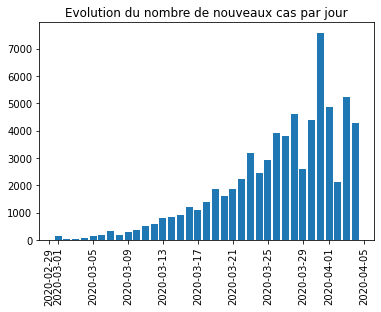

In [290]:
# Display new cases
dfig, ax = plt.subplots()
data_national.set_index('date',inplace=True)
ax.bar(data_national.index, data_national["nouveaux_cas_confirmes"])
plt.xticks(rotation=90)
plt.title("Evolution du nombre de nouveaux cas par jour")

In [291]:
# Compute new cases
deaths = np.array((list(data_national["deces"])))
new_deaths = deaths[1:] - deaths[:-1]
new_deaths = np.insert(new_deaths, 0, deaths[0])

In [292]:
# Ajouter les nouveaux cas confirmes
cpt = 0
for lab, row in data_national.iterrows():
    data_national.loc[lab, "nouveaux_deces"] = new_deaths[cpt]
    cpt+=1

Text(0.5, 1.0, 'Evolution du nombre de décès par jour')

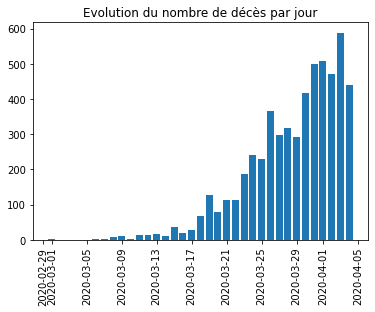

In [293]:
# Display new cases
dfig, ax = plt.subplots()
ax.bar(data_national.index, data_national["nouveaux_deces"])
plt.xticks(rotation=90)
plt.title("Evolution du nombre de décès par jour")